# Aprendizaje Supervisado
# Clasificación Parte 1
## Nicolás Salusso - 10710

#### 1) Se declara la variable **my_random** que contiene mi número de alumno. 

In [1]:
random_state = 14

#### 2) Implementación de un clasificador kNN

2.1 Se carga el dataset:

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
# brest_cancer.feature_name

X = breast_cancer.data

2.2 El target del dataset puede tomar 2 valores:
- Maligno = 0
- Benigno = 1

In [3]:
y = breast_cancer.target

2.3 Se instancia el clasificador

In [4]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')

#### 3) Se aplica z-score para normalizar los valores de los features.

In [5]:
from scipy import stats

# X2 = stats.zscore(X)
# hola = X[:,1]
X_norm = stats.zscore(X)

# for i in range(0, X.shape[1]):
#     X2[:, i] = stats.zscore(X, axis=i+1)

# print(X_norm[:10])
# print(X2[:10, 1])
#     
# for i in range(0, X_norm.shape[0]):
#     if X_norm[i] != X2[i, 1]:
#         print(X_norm[i])
#         print(X2[i, 1])
#         print('--------------------------------')

3.1 Se divide en conjunto de entrenamiento y de test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=random_state, test_size=0.3)

3.2 Se entrena el modelo y se obtiene la tasa de aciertos del clasificador

In [7]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print('Porcentaje de aciertos en la clasificación: ', clf.score(X_test,y_test))

Porcentaje de aciertos en la clasificación:  0.964912280702


#### 4) Se modifican las salidas del clasificador para que el mismo realice la mayor reducción posible del costo por errores de clasificación y se imprimen dichas salidas.

4.1 Se define la función *calculo_costo_salida* que va a ser encargada de calcular el costo total en función de los valores que se le pasan como parámetros.

In [8]:
from sklearn import metrics


def calculo_costo_salida(costo_fp, costo_fn, X_test, y_test):
    prob = clf.predict_proba(X_test)
    y_hat_cost = []
    c = costo_fn / costo_fp
    umbral_fn = c / (c + 1)
    for i in prob:
        if i[0] == 0 or i[0] == 1:
            if i[0] == 0:
                y_hat_cost.append(1)
            else:
                y_hat_cost.append(0)
        elif i[1] <= umbral_fn:
            y_hat_cost.append(0)
        elif i[1] > umbral_fn:
            y_hat_cost.append(1)
            # Con [1,0] decimos que el 1 es positivo y el 0 es negativo.
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat_cost, [1,0])
    costo_fp_total = metrics.confusion_matrix(y_test, y_hat_cost)[0, 1] * costo_fp
    costo_fn_total = metrics.confusion_matrix(y_test, y_hat_cost)[1, 0] * costo_fn
    costo_salida = costo_fp_total + costo_fn_total
    return costo_salida, confusion_matrix

4.2 Se obtiene el costo para los valores de *costo_fn* y *costo_fp* establecidos.


In [9]:
salida = calculo_costo_salida(costo_fn=20, costo_fp=5, X_test=X_test, y_test=y_test)
print('Costo total: {} \n\nConfusion Matrix: \n {}'.format(
    salida[0], salida[1]))

Costo total: 110 

Confusion Matrix: 
 [[103   5]
 [  2  61]]


#### 5) Selección de la cantidad de *n_neighbors* que menos costo genere.

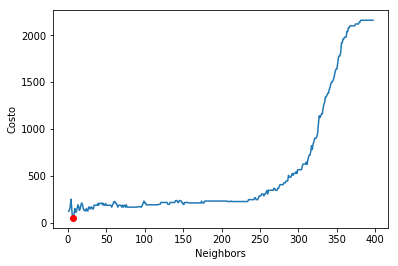

La cantidad de neighbors que da como mínimo costo 50 es: 6

Confusion Matrix:
 [[106   2]
 [  2  61]]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
costos = []
confusion_matrix = []
for i in range(1, X_train.shape[0]):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    X_norm = stats.zscore(X)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=random_state, test_size=0.3)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    salida = calculo_costo_salida(costo_fn=20, costo_fp=5, X_test=X_test, y_test=y_test)
    costos.append(salida[0])
    confusion_matrix.append(salida[1])
plt.plot(range(1, X_train.shape[0]), costos, '-', range(1, X_train.shape[0])[np.argmin(costos)], min(costos), 'ro')
plt.xlabel('Neighbors')
plt.ylabel('Costo')
plt.show()

print('La cantidad de neighbors que da como mínimo costo {} es: {}\n\nConfusion Matrix:\n {}'.format(
    min(costos), range(1, X_train.shape[0])[np.argmin(costos)], confusion_matrix[np.argmin(costos)]))

#### Fin